#Group: 17<br>
#Project Title: Best Budget Monitors on Shopee<br>
#Group Members Name:
1.   Muhammad Syazili bin Juhari (A173630)
2.   Muhammad Haiqal Najmi bin Zulkarnain (A174863)
3.   Nur Aifaa Athirah binti Mohd Azmi (A177023)
4.   Putera Niq Aziz bin Hoslam (A174622)





### Install and Import Library

In [ ]:
!pip install selenium
!apt-get update
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin
import sys
sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:3 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:4 http://archive.ubuntu.com/ubuntu bionic InRelease
Ign:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Get:7 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:11 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Get:12 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Hit:13 http://ppa.launchpad.net/graph

In [ ]:
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.support.ui import WebDriverWait
from selenium.common.exceptions import TimeoutException
from selenium.webdriver.common.by import By
from selenium.webdriver.support import expected_conditions as EC

import threading
import concurrent.futures
import re
import time
import pandas as pd
import numpy as np

### Initialization

In [ ]:
# create object for chrome options
chrome_options = webdriver.ChromeOptions()
# base_url = 'https://shopee.com.my/shop/13377506/search?page=0&sortBy=sales'

# set chrome driver options to disable any popup's from the website
# to find local path for chrome profile, open chrome browser
# and in the address bar type, "chrome://version"
chrome_options.add_argument('disable-notifications')
chrome_options.add_argument('--disable-infobars')
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')

# To disable the message, "Chrome is being controlled by automated test software"
chrome_options.add_argument("disable-infobars")
# Pass the argument 1 to allow and 2 to block
chrome_options.add_experimental_option("prefs", { 
    "profile.default_content_setting_values.notifications": 2
    })
# invoke the webdriver
browser = webdriver.Chrome('chromedriver', options = chrome_options)
#browser.get(base_url)
#delay = 5 #secods

#### Variable URL

In [ ]:
base_url = 'https://shopee.com.my/search?keyword='

keywords=['PC Monitor']

#### Variable Array

In [ ]:
title = []
price = []
brand = []
stock = []
noOfSold = []
rating = []

## Extract

In [ ]:
url = []

def load_links(base_url):
  for keyword in keywords:
    try:
      browser.get(base_url + keyword)
      WebDriverWait(browser, 10).until(EC.presence_of_element_located((By.CSS_SELECTOR, 'div.shopee-search-item-result__items')))

      for i in range(1, 5):
        browser.execute_script(f"window.scrollTo(document.body.scrollWidth * 0.3, document.body.scrollHeight * {i/5});")
        WebDriverWait(browser, 5).until(EC.presence_of_element_located((By.CSS_SELECTOR, 'div._3GAFiR')))

      soup = BeautifulSoup(browser.page_source, "html.parser")
      key_links = soup.find_all(href=True, attrs={'data-sqe': 'link'})
      for a in key_links:
        url.append(a['href'].encode("ascii", "ignore").decode())

      print(f'Found {len(key_links)} link(s) in {keyword}')
    except TimeoutException:
      print("Timeout")
    except Exception as e:
      print(f"ERROR: {e}")

load_links('https://shopee.com.my/search?keyword=')
load_links('https://shopee.com.my/mall/search?keyword=')
print(f'Total of {len(url)} links found.')

Found 50 link(s) in PC Monitor
Found 60 link(s) in PC Monitor
Total of 110 links found.


In [ ]:
for i in url:
  print(i)

/Samsung-M7-Smart-Monitor-Mobile-Connectivity-AirPlay-2-Voice-Control-(43-)-LS43AM702UEXXS-i.471781414.11144786901?sp_atk=ed71efc0-e67f-4c96-8473-085203949694
/LG-27-27GP850-UltraGear-QHD-HDR400-Nano-IPS-1ms-180Hz-G-Sync-FreeSync-Virtually-Borderless-Gaming-Monitor-i.310509807.9859697958?sp_atk=28d2b68c-fd0f-435c-8d57-99037821a9bf
/HP-DELL-LG-LENOVO-FUJITSU-IIYAMA-LCD-Color-PC-Monitor-17-19-20-Square-SXGA-VGA-Refurbished-(Random-Model)-i.271946205.13615792498?sp_atk=052644a4-3790-48d5-8cb9-2ec43649d734
/DELL-MONITOR-19-INCH-WIDESCREEN-FREE-VGA-AND-POWER-CORD-CABLE-GOOD-CONDITION.-i.537807641.11063165356?sp_atk=1aeeafd0-9ef6-4287-ac28-13b753dc488f
/PRISM-X490-PRO-120Hz-Quantum-HDR-Super-UWQHD-Curved-5120-x-1440-Adaptive-Sync-Gaming-Monitor-i.524628742.12003132467?sp_atk=2b1adda1-04e7-427c-abf1-3d60523b8401
/Monitor-PC-Lenovo-D22E-20-(21.5-1920-x-1080-VA-4MS-250NITS-VGA-HDMI-3-Years-Warranty-)-i.5529122.14743954775?sp_atk=ac35cdde-8364-401b-9322-5f969374b892
/-NEW-Full-HD-LED-Monitor-Sli

In [ ]:
threadLocal = threading.local()

def get_driver():
  driver = getattr(threadLocal, 'driver', None)
  if driver is None:
    chrome_options = webdriver.ChromeOptions()
    chrome_options.add_argument('disable-notifications')
    chrome_options.add_argument('--disable-infobars')
    chrome_options.add_argument('start-maximized')
    chrome_options.add_argument('--headless')
    chrome_options.add_argument('--no-sandbox')
    chrome_options.add_argument('--disable-dev-shm-usage')
    chrome_options.add_argument("disable-infobars") # To disable the message, "Chrome is being controlled by automated test software"
    chrome_options.add_experimental_option("prefs", {
      "profile.default_content_setting_values.notifications": 2
    })
    
    driver = webdriver.Chrome('chromedriver', options = chrome_options)
    setattr(threadLocal, 'driver', driver)
    
  return driver

In [ ]:
def fetch_data(url):
    
    try:
      print(f'[{threading.current_thread().name}] Fetching data from {url}...')

      driver = get_driver()
      driver.get("https://shopee.com.my/" + url)
      WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.CSS_SELECTOR, 'div._2v0Hgx'))) # Wait until `price` loaded within 10 secs or timeout

      soup = BeautifulSoup(driver.page_source, "html.parser")

      # Price
      price_value = getattr(soup.select_one('._2v0Hgx'), 'text', 'None')
      price.append(price_value)
      # Title
      title_value = getattr(soup.select_one('._3g8My- > span'), 'text', 'None')
      title.append(title_value)
      # Rating
      rating_value = getattr(soup.select_one('._3uBhVI'), 'text', 'None')
      rating.append(rating_value)
      # No of Sold
      noOfSold_value = getattr(soup.select_one('._3b2Btx'), 'text', 'None')
      noOfSold.append(noOfSold_value)

      brand_value = 'None'
      stock_value = 'None'

      specs = soup.select('._1pEVDa')
      for col in specs:
        key = col.select_one('label._1A0RCW').text
        value = getattr(col.select_one('div'), 'text', 'None')

        # Brand
        if 'Brand' in key and col.select_one('a') is not None:
          brand_value = col.select_one('a').text
        # Stock
        if 'Stock' in key and value is not 'None':
          stock_value = value

      brand.append(brand_value)
      stock.append(stock_value)

    except TimeoutException:
      print('TIMEOUT')
    except Exception as exc:
      print(f'[EXCEPTION]: {url} generated an exception: {exc}')

In [ ]:
start_time = time.time()

with concurrent.futures.ThreadPoolExecutor(max_workers = 10) as executor:
  executor.map(fetch_data, url)
  executor.shutdown(wait=False)

# Calculate elapsed run time
print(f"Elapsed run time: {time.time() - start_time} seconds")

[ThreadPoolExecutor-1_0] Fetching data from /Samsung-M7-Smart-Monitor-Mobile-Connectivity-AirPlay-2-Voice-Control-(43-)-LS43AM702UEXXS-i.471781414.11144786901?sp_atk=ed71efc0-e67f-4c96-8473-085203949694...
[ThreadPoolExecutor-1_1] Fetching data from /LG-27-27GP850-UltraGear-QHD-HDR400-Nano-IPS-1ms-180Hz-G-Sync-FreeSync-Virtually-Borderless-Gaming-Monitor-i.310509807.9859697958?sp_atk=28d2b68c-fd0f-435c-8d57-99037821a9bf...
[ThreadPoolExecutor-1_2] Fetching data from /HP-DELL-LG-LENOVO-FUJITSU-IIYAMA-LCD-Color-PC-Monitor-17-19-20-Square-SXGA-VGA-Refurbished-(Random-Model)-i.271946205.13615792498?sp_atk=052644a4-3790-48d5-8cb9-2ec43649d734...
[ThreadPoolExecutor-1_3] Fetching data from /DELL-MONITOR-19-INCH-WIDESCREEN-FREE-VGA-AND-POWER-CORD-CABLE-GOOD-CONDITION.-i.537807641.11063165356?sp_atk=1aeeafd0-9ef6-4287-ac28-13b753dc488f...
[ThreadPoolExecutor-1_4] Fetching data from /PRISM-X490-PRO-120Hz-Quantum-HDR-Super-UWQHD-Curved-5120-x-1440-Adaptive-Sync-Gaming-Monitor-i.524628742.1200313

## Transform

In [ ]:
print(f'Name: {len(title)} data')
print(f'Price: {len(price)} data')
print(f'Brand: {len(brand)} data')
print(f'Stock: {len(stock)} data')
print(f'Sold: {len(noOfSold)} data')
print(f'Rating: {len(rating)} data')

Name: 131 data
Price: 131 data
Brand: 131 data
Stock: 131 data
Sold: 131 data
Rating: 131 data


### Initialize DataFrame

In [ ]:
df = pd.DataFrame({
    'Product Name': title,
    'Product Price': price,
    'Product Brand': brand,
    'Product Stock': stock,
    'Product Sold': noOfSold,
    'Product Rating': rating
})
df.replace('None', np.nan, inplace=True)

#Dataframe original without cleaning
dfOri = df.copy()
dfOri.replace('None', np.nan, inplace=True)

df

,Product Name,Product Price,Product Brand,Product Stock,Product Sold,Product Rating
0,MEGRA Monitor 22 Inch / 19 Inch Monitor 75Hz P...,RM329.00 - RM459.00,NaN,418,561,4.9
1,G-Story Portable Gaming Monitor | Cyclone Port...,RM595.41 - RM978.11,NaN,3204,0,NaN
2,"Samsung LC27F390FHEXXM 27"" Super Slim Curved M...",RM739.00,Samsung,3,32,4.9
3,"Monitor DELL HP LENOVO 19"" 20"" 22"" 23"" 24"" LCD...",RM169.00 - RM459.00,DELL,49,1.1k,4.8
4,"Monitor GRADE B DELL HP LENOVO 19"" 20"" 22"" 23""...",RM90.00 - RM355.00,DELL,33,23,4.8
...,...,...,...,...,...,...
126,Acer Aopen 32HC5QRP Monitor,RM999.00,Acer,10,67,4.8
127,"LG 27"" 27UP600 UHD 4K IPS HDR400 FreeSync Ultr...","RM1,638.00",LG,1,29,4.9
128,"[New] BenQ PD2725U 27"" Thunderbolt 3 AQCOLOR C...","RM3,928.00",Benq,2,1,NaN
129,Asus ROG Strix XG279Q Gaming Monitor with WQHD...,"RM2,739.00",Asus,2,2,5.0


### Data Cleaning

#### Remove Unknown Character

In [ ]:
def deEmojify(text):
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags = re.UNICODE)
    return regrex_pattern.sub(r'',text)

In [ ]:
df['Product Name'] = df['Product Name'].apply(lambda x: deEmojify(x))
df

,Product Name,Product Price,Product Brand,Product Stock,Product Sold,Product Rating
0,MEGRA Monitor 22 Inch / 19 Inch Monitor 75Hz P...,RM329.00 - RM459.00,NaN,418,561,4.9
1,G-Story Portable Gaming Monitor | Cyclone Port...,RM595.41 - RM978.11,NaN,3204,0,NaN
2,"Samsung LC27F390FHEXXM 27"" Super Slim Curved M...",RM739.00,Samsung,3,32,4.9
3,"Monitor DELL HP LENOVO 19"" 20"" 22"" 23"" 24"" LCD...",RM169.00 - RM459.00,DELL,49,1.1k,4.8
4,"Monitor GRADE B DELL HP LENOVO 19"" 20"" 22"" 23""...",RM90.00 - RM355.00,DELL,33,23,4.8
...,...,...,...,...,...,...
126,Acer Aopen 32HC5QRP Monitor,RM999.00,Acer,10,67,4.8
127,"LG 27"" 27UP600 UHD 4K IPS HDR400 FreeSync Ultr...","RM1,638.00",LG,1,29,4.9
128,"[New] BenQ PD2725U 27"" Thunderbolt 3 AQCOLOR C...","RM3,928.00",Benq,2,1,NaN
129,Asus ROG Strix XG279Q Gaming Monitor with WQHD...,"RM2,739.00",Asus,2,2,5.0


#### Replace Missing Values

In [ ]:
def mean(lst):
  return round(sum(lst) / len(lst), 2)

In [ ]:
df['Product Price'].replace('', 'RM0.00', inplace=True)
df

,Product Name,Product Price,Product Brand,Product Stock,Product Sold,Product Rating
0,MEGRA Monitor 22 Inch / 19 Inch Monitor 75Hz P...,RM329.00 - RM459.00,NaN,418,561,4.9
1,G-Story Portable Gaming Monitor | Cyclone Port...,RM595.41 - RM978.11,NaN,3204,0,NaN
2,"Samsung LC27F390FHEXXM 27"" Super Slim Curved M...",RM739.00,Samsung,3,32,4.9
3,"Monitor DELL HP LENOVO 19"" 20"" 22"" 23"" 24"" LCD...",RM169.00 - RM459.00,DELL,49,1.1k,4.8
4,"Monitor GRADE B DELL HP LENOVO 19"" 20"" 22"" 23""...",RM90.00 - RM355.00,DELL,33,23,4.8
...,...,...,...,...,...,...
126,Acer Aopen 32HC5QRP Monitor,RM999.00,Acer,10,67,4.8
127,"LG 27"" 27UP600 UHD 4K IPS HDR400 FreeSync Ultr...","RM1,638.00",LG,1,29,4.9
128,"[New] BenQ PD2725U 27"" Thunderbolt 3 AQCOLOR C...","RM3,928.00",Benq,2,1,NaN
129,Asus ROG Strix XG279Q Gaming Monitor with WQHD...,"RM2,739.00",Asus,2,2,5.0


#### Convert K Value to Number (000's)

In [ ]:
df['Product Sold']=df['Product Sold'].replace({'k': '*1e3'}, regex=True).map(pd.eval).astype(int)
df

,Product Name,Product Price,Product Brand,Product Stock,Product Sold,Product Rating
0,MEGRA Monitor 22 Inch / 19 Inch Monitor 75Hz P...,RM329.00 - RM459.00,NaN,418,561,4.9
1,G-Story Portable Gaming Monitor | Cyclone Port...,RM595.41 - RM978.11,NaN,3204,0,NaN
2,"Samsung LC27F390FHEXXM 27"" Super Slim Curved M...",RM739.00,Samsung,3,32,4.9
3,"Monitor DELL HP LENOVO 19"" 20"" 22"" 23"" 24"" LCD...",RM169.00 - RM459.00,DELL,49,1100,4.8
4,"Monitor GRADE B DELL HP LENOVO 19"" 20"" 22"" 23""...",RM90.00 - RM355.00,DELL,33,23,4.8
...,...,...,...,...,...,...
126,Acer Aopen 32HC5QRP Monitor,RM999.00,Acer,10,67,4.8
127,"LG 27"" 27UP600 UHD 4K IPS HDR400 FreeSync Ultr...","RM1,638.00",LG,1,29,4.9
128,"[New] BenQ PD2725U 27"" Thunderbolt 3 AQCOLOR C...","RM3,928.00",Benq,2,1,NaN
129,Asus ROG Strix XG279Q Gaming Monitor with WQHD...,"RM2,739.00",Asus,2,2,5.0


#### Remove NaN Values

In [ ]:
df = df.dropna()
df=df.reset_index(drop=True)
df

,Product Name,Product Price,Product Brand,Product Stock,Product Sold,Product Rating
0,"Samsung LC27F390FHEXXM 27"" Super Slim Curved M...",RM739.00,Samsung,3,32,4.9
1,"Monitor DELL HP LENOVO 19"" 20"" 22"" 23"" 24"" LCD...",RM169.00 - RM459.00,DELL,49,1100,4.8
2,"Monitor GRADE B DELL HP LENOVO 19"" 20"" 22"" 23""...",RM90.00 - RM355.00,DELL,33,23,4.8
3,SAMSUNG LC24F390FHEXXM 23.5' CURVED MONITOR wi...,RM585.00,Samsung,9,1300,4.9
4,Samsung 24 Curved LED Monitor CF390 with Super...,RM579.00,Samsung,149,108,4.8
...,...,...,...,...,...,...
78,[SALE] PC / PlayStation / Nintendo Switch Gami...,"RM449.00 - RM1,899.00",Acer,8,2,4.0
79,Acer Aopen 32HC5QRP Monitor,RM999.00,Acer,10,67,4.8
80,"LG 27"" 27UP600 UHD 4K IPS HDR400 FreeSync Ultr...","RM1,638.00",LG,1,29,4.9
81,Asus ROG Strix XG279Q Gaming Monitor with WQHD...,"RM2,739.00",Asus,2,2,5.0


In [ ]:
len(df)

83

### Data Processing

#### Product Price

In [ ]:
df['Product Price'] = df['Product Price'].astype(str).str.replace('RM', '').str.replace(',', '').str.split('-').apply(lambda row: mean([float(x.strip(' ')) for x in row])if type(row) is not float else 0)
df

,Product Name,Product Price,Product Brand,Product Stock,Product Sold,Product Rating
0,"Samsung LC27F390FHEXXM 27"" Super Slim Curved M...",739.00,Samsung,3,32,4.9
1,"Monitor DELL HP LENOVO 19"" 20"" 22"" 23"" 24"" LCD...",314.00,DELL,49,1100,4.8
2,"Monitor GRADE B DELL HP LENOVO 19"" 20"" 22"" 23""...",222.50,DELL,33,23,4.8
3,SAMSUNG LC24F390FHEXXM 23.5' CURVED MONITOR wi...,585.00,Samsung,9,1300,4.9
4,Samsung 24 Curved LED Monitor CF390 with Super...,579.00,Samsung,149,108,4.8
...,...,...,...,...,...,...
78,[SALE] PC / PlayStation / Nintendo Switch Gami...,1174.00,Acer,8,2,4.0
79,Acer Aopen 32HC5QRP Monitor,999.00,Acer,10,67,4.8
80,"LG 27"" 27UP600 UHD 4K IPS HDR400 FreeSync Ultr...",1638.00,LG,1,29,4.9
81,Asus ROG Strix XG279Q Gaming Monitor with WQHD...,2739.00,Asus,2,2,5.0


#### Product Sold

In [ ]:
avg_1 = df['Product Sold'].astype("float").mean(axis = 0)
df['Product Sold'].replace(0, avg_1, inplace = True)
df

,Product Name,Product Price,Product Brand,Product Stock,Product Sold,Product Rating
0,"Samsung LC27F390FHEXXM 27"" Super Slim Curved M...",739.00,Samsung,3,32,4.9
1,"Monitor DELL HP LENOVO 19"" 20"" 22"" 23"" 24"" LCD...",314.00,DELL,49,1100,4.8
2,"Monitor GRADE B DELL HP LENOVO 19"" 20"" 22"" 23""...",222.50,DELL,33,23,4.8
3,SAMSUNG LC24F390FHEXXM 23.5' CURVED MONITOR wi...,585.00,Samsung,9,1300,4.9
4,Samsung 24 Curved LED Monitor CF390 with Super...,579.00,Samsung,149,108,4.8
...,...,...,...,...,...,...
78,[SALE] PC / PlayStation / Nintendo Switch Gami...,1174.00,Acer,8,2,4.0
79,Acer Aopen 32HC5QRP Monitor,999.00,Acer,10,67,4.8
80,"LG 27"" 27UP600 UHD 4K IPS HDR400 FreeSync Ultr...",1638.00,LG,1,29,4.9
81,Asus ROG Strix XG279Q Gaming Monitor with WQHD...,2739.00,Asus,2,2,5.0


In [ ]:
df['Product Sold']=df['Product Sold'].map(pd.eval).astype(int)
df

,Product Name,Product Price,Product Brand,Product Stock,Product Sold,Product Rating
0,"Samsung LC27F390FHEXXM 27"" Super Slim Curved M...",739.00,Samsung,3,32,4.9
1,"Monitor DELL HP LENOVO 19"" 20"" 22"" 23"" 24"" LCD...",314.00,DELL,49,1100,4.8
2,"Monitor GRADE B DELL HP LENOVO 19"" 20"" 22"" 23""...",222.50,DELL,33,23,4.8
3,SAMSUNG LC24F390FHEXXM 23.5' CURVED MONITOR wi...,585.00,Samsung,9,1300,4.9
4,Samsung 24 Curved LED Monitor CF390 with Super...,579.00,Samsung,149,108,4.8
...,...,...,...,...,...,...
78,[SALE] PC / PlayStation / Nintendo Switch Gami...,1174.00,Acer,8,2,4.0
79,Acer Aopen 32HC5QRP Monitor,999.00,Acer,10,67,4.8
80,"LG 27"" 27UP600 UHD 4K IPS HDR400 FreeSync Ultr...",1638.00,LG,1,29,4.9
81,Asus ROG Strix XG279Q Gaming Monitor with WQHD...,2739.00,Asus,2,2,5.0


#### Product Stock

In [ ]:
df['Product Stock'] = df['Product Stock'].astype(int)
df

,Product Name,Product Price,Product Brand,Product Stock,Product Sold,Product Rating
0,"Samsung LC27F390FHEXXM 27"" Super Slim Curved M...",739.00,Samsung,3,32,4.9
1,"Monitor DELL HP LENOVO 19"" 20"" 22"" 23"" 24"" LCD...",314.00,DELL,49,1100,4.8
2,"Monitor GRADE B DELL HP LENOVO 19"" 20"" 22"" 23""...",222.50,DELL,33,23,4.8
3,SAMSUNG LC24F390FHEXXM 23.5' CURVED MONITOR wi...,585.00,Samsung,9,1300,4.9
4,Samsung 24 Curved LED Monitor CF390 with Super...,579.00,Samsung,149,108,4.8
...,...,...,...,...,...,...
78,[SALE] PC / PlayStation / Nintendo Switch Gami...,1174.00,Acer,8,2,4.0
79,Acer Aopen 32HC5QRP Monitor,999.00,Acer,10,67,4.8
80,"LG 27"" 27UP600 UHD 4K IPS HDR400 FreeSync Ultr...",1638.00,LG,1,29,4.9
81,Asus ROG Strix XG279Q Gaming Monitor with WQHD...,2739.00,Asus,2,2,5.0


#### Product Rating

In [ ]:
df['Product Rating']=df['Product Rating'].map(pd.eval).astype(float)
df

,Product Name,Product Price,Product Brand,Product Stock,Product Sold,Product Rating
0,"Samsung LC27F390FHEXXM 27"" Super Slim Curved M...",739.00,Samsung,3,32,4.9
1,"Monitor DELL HP LENOVO 19"" 20"" 22"" 23"" 24"" LCD...",314.00,DELL,49,1100,4.8
2,"Monitor GRADE B DELL HP LENOVO 19"" 20"" 22"" 23""...",222.50,DELL,33,23,4.8
3,SAMSUNG LC24F390FHEXXM 23.5' CURVED MONITOR wi...,585.00,Samsung,9,1300,4.9
4,Samsung 24 Curved LED Monitor CF390 with Super...,579.00,Samsung,149,108,4.8
...,...,...,...,...,...,...
78,[SALE] PC / PlayStation / Nintendo Switch Gami...,1174.00,Acer,8,2,4.0
79,Acer Aopen 32HC5QRP Monitor,999.00,Acer,10,67,4.8
80,"LG 27"" 27UP600 UHD 4K IPS HDR400 FreeSync Ultr...",1638.00,LG,1,29,4.9
81,Asus ROG Strix XG279Q Gaming Monitor with WQHD...,2739.00,Asus,2,2,5.0


#### DataType

In [ ]:
df.dtypes

Product Name       object
Product Price     float64
Product Brand      object
Product Stock       int64
Product Sold        int64
Product Rating    float64
dtype: object

## Visualization

In [ ]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import math

#### Histogram

In [ ]:
soldDF = df ['Product Sold']
soldDF

0       32
1     1100
2       23
3     1300
4      108
      ... 
78       2
79      67
80      29
81       2
82     436
Name: Product Sold, Length: 83, dtype: int64

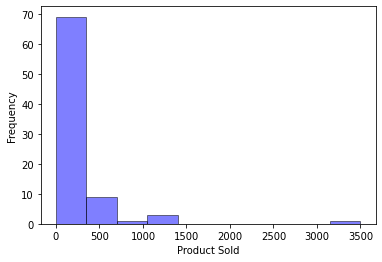

In [ ]:
plt.figure()
plt.xlabel('Product Sold')
plt.ylabel('Frequency')
plt.hist(soldDF, bins=10, edgecolor='black',facecolor='blue', alpha=0.5)
plt.show()

#### Box Plot

{'boxes': [<matplotlib.lines.Line2D at 0x7f62f363b4d0>],
 'caps': [<matplotlib.lines.Line2D at 0x7f62f3b63e10>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f62f3ce7f50>],
 'means': [<matplotlib.lines.Line2D at 0x7f62f3ce7e10>],
 'medians': [<matplotlib.lines.Line2D at 0x7f62f3bf2150>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f62f363bd10>,
  <matplotlib.lines.Line2D at 0x7f62f363b2d0>]}

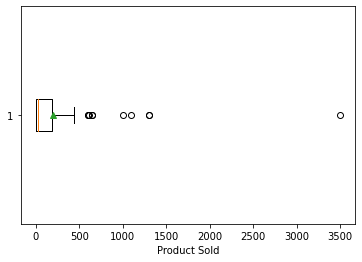

In [ ]:
plt.xlabel('Product Sold')
plt.boxplot(soldDF, showmeans=True, vert=False)

#### New Histogram and Boxplot

In [ ]:
newDataDF = df
newDataDF.drop(newDataDF[(newDataDF['Product Sold'] > 100)].index, inplace=True)
newDataDF

,Product Name,Product Price,Product Brand,Product Stock,Product Sold,Product Rating
0,"Samsung LC27F390FHEXXM 27"" Super Slim Curved M...",739.0,Samsung,3,32,4.9
2,"Monitor GRADE B DELL HP LENOVO 19"" 20"" 22"" 23""...",222.5,DELL,33,23,4.8
5,"Used Monitor PC Screen Dell, HP, Samsung, LG, ...",310.0,MIX BRAND & MODEL,11,53,5.0
6,Full Set PC Computer HP Lenovo Dell i3 i5 Desk...,682.0,DELL,34,58,5.0
7,Samsung Curved FHD LED Monitor Super Slim and ...,609.0,Samsung,6,16,5.0
10,"Loctek D2T 10""-30"" Triple Display Ergonomic VE...",0.0,Loctek,50,11,5.0
12,"HUAWEI MateView GT | 34"" Curved Monitor | 3K 1...",2488.0,Huawei,30,11,5.0
13,Samsung 27'' Curved Monitor / FreeSync / Eco-S...,599.0,Samsung,5,13,5.0
14,"Samsung 24"" Curved Monitor / FreeSync / Eco-Sa...",799.0,Samsung,4,8,4.2
16,Samsung 27'' Curved Monitor / FreeSync / Eco-S...,799.0,Samsung,4,8,5.0


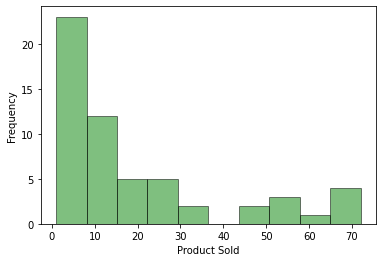

In [ ]:
newSoldDF = newDataDF['Product Sold']

plt.figure()
plt.xlabel('Product Sold')
plt.ylabel('Frequency')
plt.hist(newSoldDF, bins=10, edgecolor='black',facecolor='green', alpha=0.5)
plt.show()

{'boxes': [<matplotlib.lines.Line2D at 0x7f62ee93bb50>],
 'caps': [<matplotlib.lines.Line2D at 0x7f62ee94a4d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f62ee7b5690>],
 'means': [<matplotlib.lines.Line2D at 0x7f62ee7b5b10>],
 'medians': [<matplotlib.lines.Line2D at 0x7f62ee94af90>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f62ee93b410>,
  <matplotlib.lines.Line2D at 0x7f62ee93b950>]}

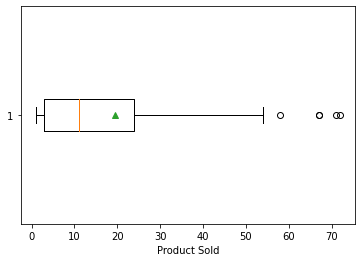

In [ ]:
plt.xlabel('Product Sold')
plt.boxplot(newSoldDF, showmeans=True, vert=False)

#### Analysis Result

In [ ]:
print('Mean: ', newDataDF['Product Sold'].mean())

Mean:  19.385964912280702


In [ ]:
print('Minimum value: ', newDataDF['Product Sold'].min())

Minimum value:  1


In [ ]:
print('Maximum value: ', newDataDF['Product Sold'].max())

Maximum value:  72


#### Scatterplot

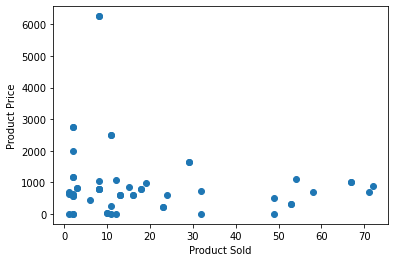

In [ ]:
newSoldDF = newDataDF['Product Sold']
newPriceDF = newDataDF['Product Price']

plt.figure()
plt.scatter(newSoldDF,newPriceDF)
plt.xlabel('Product Sold')
plt.ylabel('Product Price')
plt.show()

In [ ]:
newDataDF[['Product Sold', 'Product Price']].corr()

,Product Sold,Product Price
Product Sold,1.000000,-0.145599
Product Price,-0.145599,1.000000


## Load

Mount Google Drive

In [ ]:
from google.colab import drive
drive.mount('drive')

Mounted at drive


Export DataFrame

In [ ]:
df.to_csv('/content/drive/MyDrive/Colab Notebooks/Group 17 - ETL Group Project.csv', encoding='utf-8', index=False)